In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
IMG_SIZE=224
BATCH_SIZE=32

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [ ]:
train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/Malaria_cell',target_size=(IMG_SIZE,IMG_SIZE),batch_size=BATCH_SIZE,class_mode='binary',subset='training')

Found 554 images belonging to 1 classes.


In [ ]:
val_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/Malaria_cell',target_size=(IMG_SIZE,IMG_SIZE),batch_size=BATCH_SIZE,class_mode='binary',subset='validation')

Found 138 images belonging to 1 classes.


In [ ]:
 model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
 ])

In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=3,validation_data=val_generator,batch_size=BATCH_SIZE)

Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 73s 4s/step - accuracy: 0.9811 - loss: 0.1350 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 69s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 69s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [ ]:
model.save('/content/drive/MyDrive/Malaria_cell/cell_images/mona.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model = load_model('/content/drive/MyDrive/Malaria_cell/cell_images/mona.h5')
print("Model Loaded")

Model Loaded


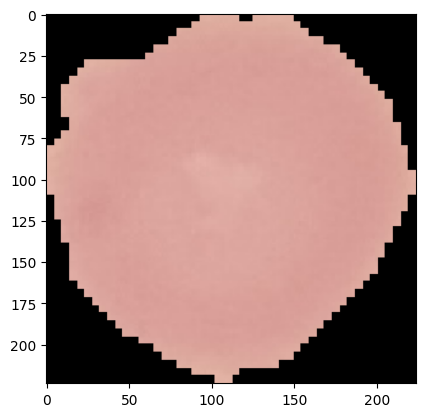

In [ ]:
 test_image_path="/content/drive/MyDrive/Malaria_cell/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_144.png"
 img=image.load_img(test_image_path,target_size=(224,224))
 plt.imshow(img)
 plt.axis()
 plt.show()

In [ ]:
 img_array=image.img_to_array(img)
 img_array=np.expand_dims(img_array,axis=0)
 img_array /= 255
 prediction=model.predict(img_array)
 print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
[[0.]]


In [ ]:
if prediction>=0.5:
  print("Malaria  Detected")
else:
  print("Malaria Not Detected")

Malaria Not Detected
